# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels  as sm
import pylab as pl
import numpy as np
import scipy.stats as stats
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

IOError: File ../assets/admissions.csv does not exist

## Questions
#### Question 1. How many observations are in our dataset? 


In [41]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [42]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [43]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE would have a larger standard deviation on a relative scale since the range of numbers for gre are from 200-800 (change of 600) and gpa is 2.26-4.0 (change of 1.74).

#### Question 4. Drop data points with missing data


In [44]:
df_raw.dropna().shape

(397, 4)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: We could rerun the same stats as before. Could also run conditon to look for and false values when looking for is not null and do count, count should be 0

#### Question 6. Create box plots for GRE and GPA

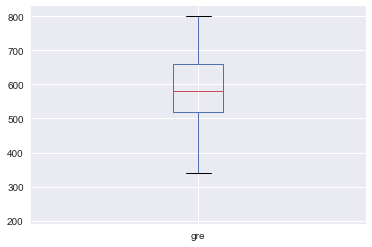

In [45]:
df_raw.boxplot('gre')

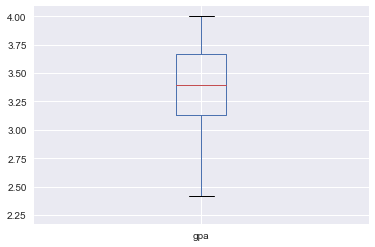

In [46]:
df_raw.boxplot('gpa')

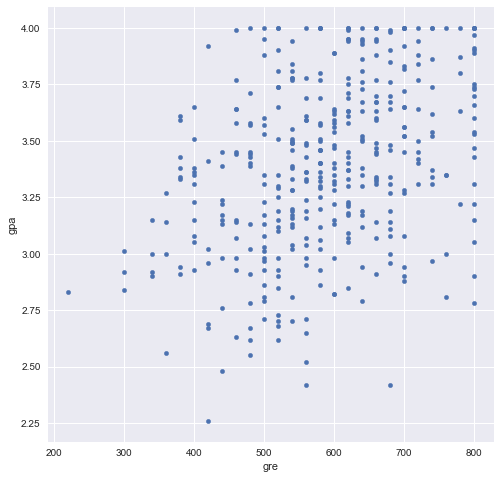

In [47]:
df_raw.plot(kind='scatter', x='gre', y='gpa', figsize=(8, 8))

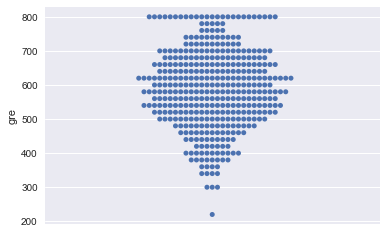

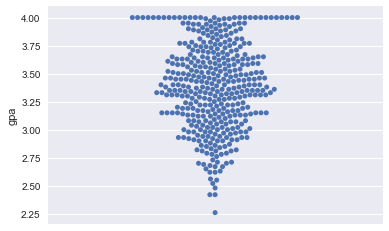

In [78]:
import seaborn as sns

sns.swarmplot(y=df_raw['gre'])
plt.show()
sns.swarmplot(y=df_raw['gpa'])
plt.show()

#### Question 7. What do this plots show?

Answer: It shows that both data sets have a few outliers. Both visually appear to have the same sort of distribution and same amount of variation respectively. 

#### Question 8. Describe each distribution 

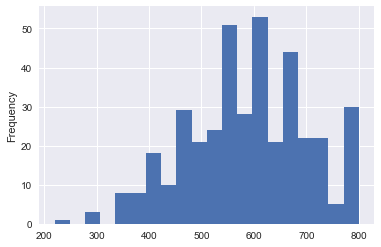

In [59]:
df_raw['gre'].plot.hist(bins=20);

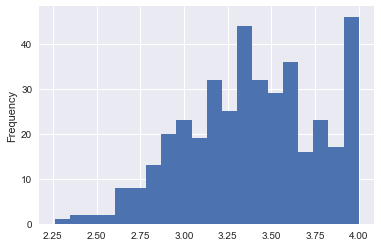

In [60]:
df_raw['gpa'].plot.hist(bins=20);

In [ ]:
df_raw[''].plot.hist(bins=20);

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [69]:
gre_skew = df_raw.gre.skew()
gre_kurt = df_raw.gre.kurt()
gpa_skew = df_raw.gpa.skew()
gpa_kurt = df_raw.gpa.kurt()

print [gre_kurt, gre_skew]
print [gpa_kurt, gpa_skew]

[-0.33006533816662031, -0.15012666594587223]
[-0.57462254321495232, -0.21176549033509626]


No, this data is skewed to the right, we would look to do some adjustments to the data to normalize the data into a more standard distribution

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, we could do log transformation of the data to bring it to a more normal distribution prior to modeling. We may also want to handle outliers and missing values prior to this in data cleansing

#### Question 11. Which of our variables are potentially colinear? 

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


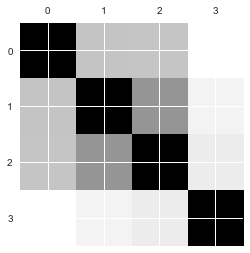

In [82]:
plt.matshow(df_raw.corr())
df_raw.corr()

GRE and GPA are potentially colinear

#### Question 12. What did you find?

Answer: That gre is colinear to gpa and gpa is colinear to gre.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would create acceptance rates as a percentage of applicants from each school and then look at a plot of acceptance rate and prestige which should show as prestige increase that acceptance rates as a percentage increase.

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that this will be true.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Done up top in the code

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

Didn't have time to code, but would grab average gpe and gpa and then find replace with the mean value